In [17]:
import pickle
import pandas as pd
import requests
from bs4 import BeautifulSoup
import sys
import os
from collections import defaultdict
import re
import json
from collections import Counter
import dateutil
from dateutil import parser
from collections import defaultdict
from __future__ import division
import datetime
%pylab inline
from numpy import arange
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.mpl_style = 'default'

Populating the interactive namespace from numpy and matplotlib


In [18]:
def parseint(string):
    string = str(string)
    return int(''.join([x for x in string if x.isdigit()]))

In [19]:
with open('movie_info_revised.p' ,'r') as picklefile:
    data = pickle.load(picklefile)

In [20]:
def date_helper(date):
    try:
        date = parser.parse(date)
        return True
    except: 
        pass
    return False

In [21]:
history_keys_dic = defaultdict(dict)
for key in data.keys():
    if 'Horror' in data[key]['genre']:
        if date_helper(data[key]['date']):
            year = parser.parse(data[key]['date']).year
            history_keys_dic['count'][year]= history_keys_dic['count'].get(year, 0) + 1  
history_df = pd.DataFrame.from_dict(history_keys_dic)
start = pd.datetime(1980, 1, 1)
end = pd.datetime(2016, 1, 1)
x = pd.date_range(start, end, freq='A').year
history_df_years = history_df.reindex(x)
history_df = history_df_years.fillna(0)
history_df['rolling mean']=pd.rolling_mean(history_df['count'], 5).shift(+1)
history_df['difference from mean']=history_df['count']/history_df['rolling mean']

In [22]:
history_keys_dic

defaultdict(<type 'dict'>, {'count': {1972: 6, 1973: 11, 1974: 8, 1975: 6, 1976: 17, 1977: 14, 1978: 18, 1979: 15, 1980: 15, 1981: 18, 1982: 15, 1983: 16, 1984: 11, 1985: 18, 1986: 28, 1987: 29, 1988: 38, 1989: 24, 1990: 28, 1991: 12, 1992: 13, 1993: 15, 1994: 12, 1995: 17, 1996: 13, 1997: 12, 1998: 16, 1999: 15, 2000: 17, 2001: 17, 2002: 22, 2003: 21, 2004: 16, 2005: 30, 2006: 27, 2007: 43, 2008: 43, 2009: 36, 2010: 34, 2011: 29, 2012: 64, 2013: 32, 2014: 5, 2015: 18, 2016: 2}})

In [23]:
history_df

,count,rolling mean,difference from mean
1980,15,NaN,NaN
1981,18,NaN,NaN
1982,15,NaN,NaN
1983,16,NaN,NaN
1984,11,NaN,NaN
1985,18,15.0,1.200000
1986,28,15.6,1.794872
1987,29,17.6,1.647727
1988,38,20.4,1.862745
1989,24,24.8,0.967742


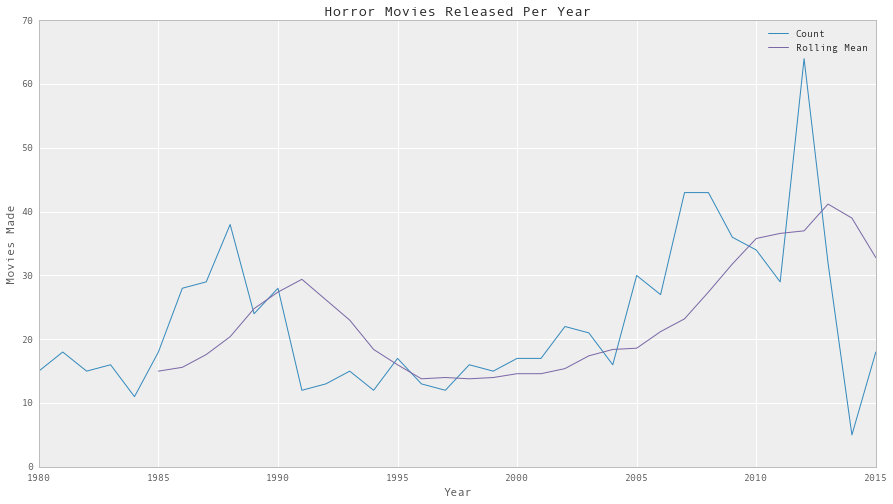

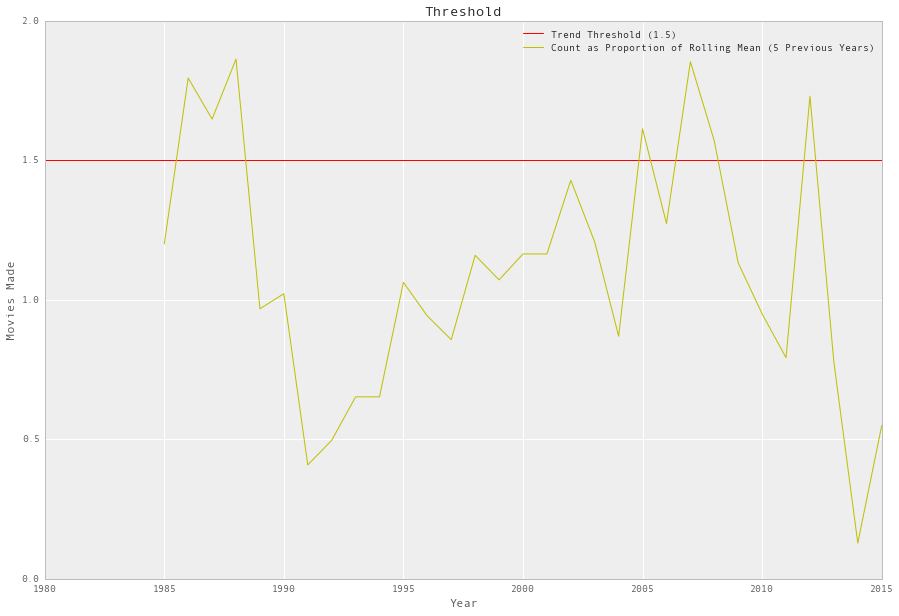

In [24]:
df = history_df.reset_index()
df['cutoff'] = 1.5
count = df['count']
rolling_mean = df['rolling mean']
difference_mean = df['difference from mean']
date = df['index']
cutoff = df['cutoff']
figure(figsize=(15,8))
# red dashes, blue squares and green triangles
count_line = plt.plot(date, count, label=count)
rolling_mean_line = plt.plot(date,rolling_mean, label=rolling_mean)
plt.legend(['Count','Rolling Mean'])
plt.title('Horror Movies Released Per Year')
plt.ylabel('Movies Made')
plt.xlabel('Year')
plt.show()

# red dashes, blue squares and green triangles
figure(figsize=(15,10))
count_line = plt.plot(date, cutoff, 'r-', label=count)
rolling_mean_line = plt.plot(date, difference_mean, 'y-', label=count)
plt.legend(['Trend Threshold (1.5)', 'Count as Proportion of Rolling Mean (5 Previous Years)'])
plt.title('Threshold')
plt.ylabel('Movies Made')
plt.xlabel('Year')
plt.show()

In [25]:
history_dic = defaultdict(dict)
for key in data.keys():
    if 'Horror' in data[key]['genre']:
        if date_helper(data[key]['date']):
            year = parser.parse(data[key]['date']).year
            history_dic[year][key]= defaultdict(dict)
            history_dic[year][key]['date']= data[key]['date']
            history_dic[year][key]['screens']= data[key]['screens']
            history_dic[year][key]['opening']= data[key]['opening']
                #space_dic['space'][year].append(key,)

In [26]:
history_dic

defaultdict(<type 'dict'>, {1972: {'Crescendo': defaultdict(<type 'dict'>, {'date': '29 November 1972', 'screens': 'Error', 'opening': 'N/A'}), 'Dracula A.D. 1972': defaultdict(<type 'dict'>, {'date': '17 November 1972', 'screens': 'Error', 'opening': 'N/A'}), "Children Shouldn't Play with Dead Things": defaultdict(<type 'dict'>, {'date': '20 September 1972', 'screens': 'Error', 'opening': 'N/A'}), "Don't Torture a Duckling": defaultdict(<type 'dict'>, {'date': '29 September 1972', 'screens': 'Error', 'opening': 'N/A'}), 'Images': defaultdict(<type 'dict'>, {'date': '18 December 1972', 'screens': 'Error', 'opening': 'N/A'}), 'Asylum': defaultdict(<type 'dict'>, {'date': '17 November 1972', 'screens': 'Error', 'opening': 'N/A'})}, 1973: {'Tales That Witness Madness': defaultdict(<type 'dict'>, {'date': '31 October 1973', 'screens': 'Error', 'opening': 'N/A'}), 'A Thief in the Night': defaultdict(<type 'dict'>, {'date': '22 March 1973', 'screens': 'Error', 'opening': 'N/A'}), 'Scream Bla

In [27]:
def makedf(genre):
    frames = []
    years = []
    for year, movies in genre.items():
        years.append(year)
        frames.append(pd.DataFrame.from_dict(movies, orient='index'))
    genre = pd.concat(frames, keys=years)
    genre = genre[genre.screens != 'N/A']
    genre = genre[genre.screens != 'n/a']
    genre = genre[genre.screens != 'Error']
    genre = genre[genre.opening != 'N/A']
    genre = genre[genre.screens != '']
    genre = genre[genre.opening != '']
    genre = genre[genre.opening != 'n/a']
    genre = genre[genre.opening != 'Error']
    genre['opening'] = genre['opening'].map(lambda x: parseint(x))
    genre['screens'] = genre['screens'].map(lambda x: parseint(x))
    genre['date'] = genre['date'].map(lambda x: parser.parse(x))
    genre['normalized_opening']= genre['opening']/genre['screens']
    genre = genre[genre.normalized_opening < 20000]
    return genre

In [28]:
genre=makedf(history_dic)
pd.set_option('display.max_rows', 1000)
genre1 = genre[genre.screens > 50]
genre1 = genre1.reset_index()
genre1

,level_0,level_1,date,screens,opening,normalized_opening
0,1976,King Kong,1976-12-17,974,7023921,7211.417864
1,1976,The Omen,1976-06-25,515,4273886,8298.807767
2,1977,Exorcist II: The Heretic,1977-06-17,703,6735000,9580.369844
3,1978,Damien: Omen II,1978-06-09,525,3880880,7392.152381
4,1978,Jaws 2,1978-06-16,640,9866023,15415.660938
5,1979,Dracula,1979-07-20,395,3141281,7952.610127
6,1979,The Amityville Horror,1979-07-27,748,7843467,10485.918449
7,1980,Friday the 13th,1980-05-09,1100,5816321,5287.564545
8,1980,The Awakening,1980-10-31,909,2728520,3001.672167
9,1981,An American Werewolf in London,1981-08-21,870,3786512,4352.312644


In [29]:
trend = genre1[57:111]

trend

,level_0,level_1,date,screens,opening,normalized_opening
57,1986,Aliens,1986-07-18,1437,10052042,6995.157968
58,1986,April Fool's Day,1986-03-28,1202,3373779,2806.804493
59,1986,Deadly Friend,1986-10-10,1213,3804429,3136.380049
60,1986,From Beyond,1986-10-24,190,514417,2707.457895
61,1986,Haunted Honeymoon,1986-07-25,1046,2768003,2646.274379
62,1986,House,1986-02-28,1440,5923972,4113.869444
63,1986,Invaders from Mars,1986-06-06,1212,2046576,1688.594059
64,1986,Jason Lives: Friday the 13th Part VI,1986-08-01,1610,6750837,4193.066460
65,1986,King Kong Lives,1986-12-19,1105,1172942,1061.485973
66,1986,Link,1986-09-19,435,660874,1519.250575


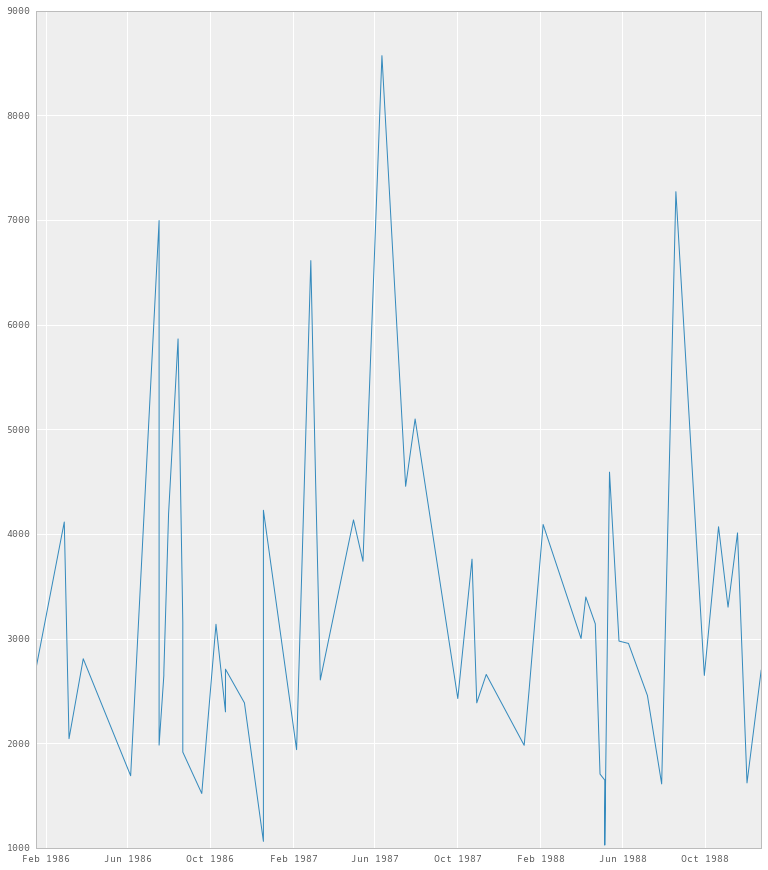

In [30]:
figure(figsize=(13,15))
trend = trend.sort(['date'])
plt.plot(trend['date'], trend['normalized_opening'])

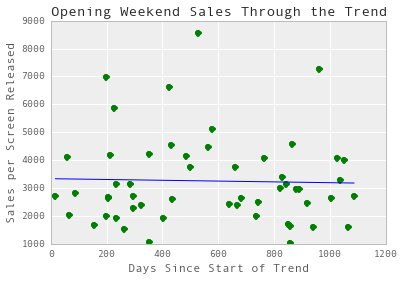

In [41]:
trend['time_delta']=trend['date'].apply(lambda x: str(x - parser.parse('1986-01-01')))
trend['time_delta_num'] = trend['time_delta'].str.replace(r'days[\s\S]+', '').apply(lambda x: int(x))

def sort_season(x):
    if x == 1:
        return 'January'
    if x == 2:
        return 'February'
    if x == 3:
        return 'March'
    if x == 4:
        return 'April'
    if x == 5:
        return 'May'
    if x == 6:
        return 'June'
    if x == 7:
        return 'July'
    if x == 8:
        return 'August'
    if x == 9:
        return 'September'
    if x == 10:
        return 'October'
    if x == 12:
        return 'November'
    if x == 12:
        return 'December'

trend['season']=trend['date'].apply(lambda x: sort_season(x.month))
from patsy import dmatrices
from patsy import dmatrix
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
#plot_data = trend
y, X = dmatrices('normalized_opening ~ time_delta_num ', data = trend, return_type= 'dataframe')
model = sm.OLS(y, X)
plt.title('Opening Weekend Sales Through the Trend')
plt.ylabel('Sales per Screen Released')
plt.xlabel('Days Since Start of Trend')
fitted = model.fit()
plot(X['time_delta_num'], y, 'go')
plot(X['time_delta_num'], fitted.fittedvalues, 'b')



In [42]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     normalized_opening   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                   0.04400
Date:                Fri, 09 Oct 2015   Prob (F-statistic):              0.835
Time:                        09:12:59   Log-Likelihood:                -473.73
No. Observations:                  54   AIC:                             951.5
Df Residuals:                      52   BIC:                             955.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept       3333.7667    439.055      7.593      0.000      2452.738  4214.795
time_delta_num    -0.1430      0.682     -0.210      0.835        -1.511     1.225
==============================================================================
Omnibus:                       18.750   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.758
Skew:                           1.340   Prob(JB):                     6.93e-06
Kurtosis:                       4.837   Cond. No.                     1.31e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:

with open('horror.p', 'w') as picklefile:
    pickle.dump(trend, picklefile)